# FBI Uniform Crime Reporting Analysis | 2012

Authors:
- Bharath Raju Palla
- Preetham Reddy Gollapalli
- Sai Revanth Reddy Boda


## Table of Contents

1. Establishing connection with kaggle
2. Importing libraries
3. Importing dataset    
4. Basic Text Data Pre-processing & Cleaning Text Data
5. Preparing Data for Exploratory Data Analysis (EDA)
6. Exploratory Data Analysis
7. Feature Selection
8. Data modelling
9. Conclusion
10. Reference


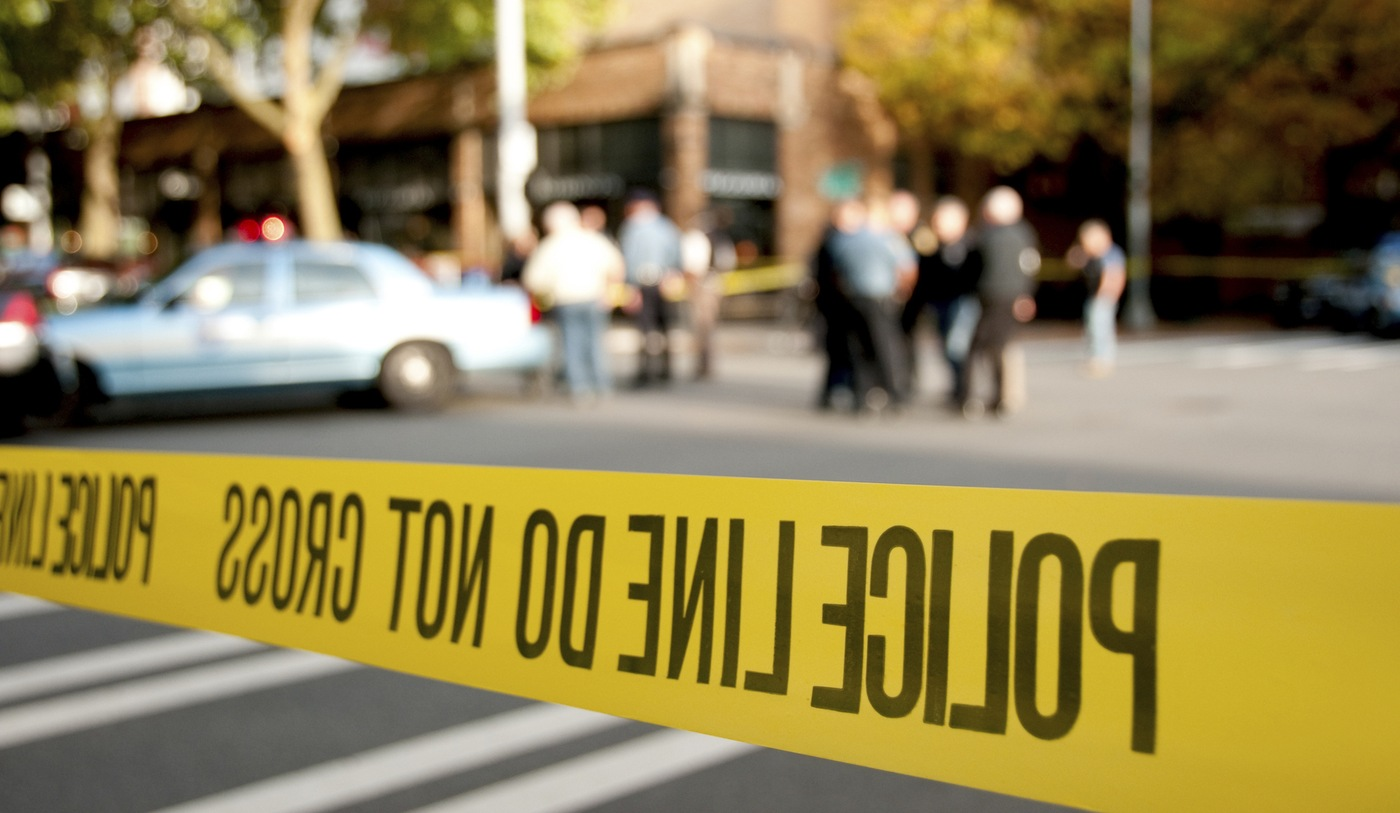

[Image Source](https://www.fbi.gov/news/stories/latest-crime-statistics-released)

># **1- Importing dataset ditectly from kaggle**
---

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session

Saving U.S._Offense_Type_by_Agency_2012.xlsx to U.S._Offense_Type_by_Agency_2012.xlsx


># **2- Importing libraries**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

import math

># **3- Importing dataset**
---

In [ ]:
df = pd.read_excel("U.S._Offense_Type_by_Agency_2012.xlsx", skiprows=3, skipfooter= 4, header=[0,1])
df

State              Agency Type        Agency Name  \
     Unnamed: 0_level_1       Unnamed: 1_level_1 Unnamed: 2_level_1   
0               ALABAMA                   Cities             Hoover   
1               ARIZONA                   Cities    Apache Junction   
2                   NaN                      NaN            Gilbert   
3                   NaN    Metropolitan Counties              Yuma2   
4              ARKANSAS                   Cities               Alma   
...                 ...                      ...                ...   
5230                NaN                      NaN               Sauk   
5231                NaN                      NaN             Sawyer   
5232                NaN                      NaN              Vilas   
5233                NaN  Other Agencies - Tribal      Oneida Tribal   
5234                NaN                      NaN   St. Croix Tribal   

            Population1 Crimes Against Persons                      \
     Unnamed: 3_level_1      Assault\nOffenses Aggravated\nAssault   
0               82332.0                  870.0                25.0   
1               36986.0                  559.0                96.0   
2              214264.0                 1242.0               123.0   
3                   NaN                  555.0                94.0   
4                5439.0                  197.0                11.0   
...                 ...                    ...                 ...   
5230                NaN                   80.0                14.0   
5231                NaN                   79.0                21.0   
5232                NaN                   42.0                 3.0   
5233                NaN                   56.0                14.0   
5234                NaN                   14.0                 1.0   

                                                      \
     Simple\nAssault Intimidation Homicide\nOffenses   
0              594.0        251.0                2.0   
1              381.0         82.0                1.0   
2              892.0        227.0                5.0   
3              376.0         85.0               26.0   
4              108.0         78.0                NaN   
...              ...          ...                ...   
5230            63.0          3.0                NaN   
5231            56.0          2.0                NaN   
5232            39.0          NaN                NaN   
5233            39.0          3.0                NaN   
5234            10.0          3.0                NaN   

                                           ... Crimes Against Society  \
     Murder and Nonnegligent Manslaughter  ...     Gambling\nOffenses   
0                                     2.0  ...                    NaN   
1                                     1.0  ...                    NaN   
2                                     5.0  ...                    NaN   
3                                    26.0  ...                    NaN   
4                                     NaN  ...                    NaN   
...                                   ...  ...                    ...   
5230                                  NaN  ...                    NaN   
5231                                  NaN  ...                    NaN   
5232                                  NaN  ...                    NaN   
5233                                  NaN  ...                    NaN   
5234                                  NaN  ...                    NaN   

                                                                     \
     Betting/\nWagering Operating/\nPromoting/\nAssisting\nGambling   
0                   NaN                                         NaN   
1                   NaN                                         NaN   
2                   NaN                                         NaN   
3                   NaN                                         NaN   
4                   NaN                                         NaN   
...    

> # **4- Basic Text Data Pre-processing**
---

In [ ]:
df["State"] = df["State"].fillna(method='ffill', axis=0)
df["Agency Type"] = df["Agency Type"].fillna(method='ffill', axis=0)

new_col = []
for col in df.columns:
  if "Unnamed" in col[1]:
    new_col.append(col[0])
  else:
    new_col.append((col[0],col[1]))
new_col

df.columns = new_col
df

,State,Agency Type,Agency Name,Population1,"(Crimes Against Persons, Assault\nOffenses)","(Crimes Against Persons, Aggravated\nAssault)","(Crimes Against Persons, Simple\nAssault)","(Crimes Against Persons, Intimidation)","(Crimes Against Persons, Homicide\nOffenses)","(Crimes Against Persons, Murder and Nonnegligent Manslaughter)",...,"(Crimes Against Society, Gambling\nOffenses)","(Crimes Against Society, Betting/\nWagering)","(Crimes Against Society, Operating/\nPromoting/\nAssisting\nGambling)","(Crimes Against Society, Gambling\nEquipment\nViolations)","(Crimes Against Society, Sports\nTampering)","(Crimes Against Society, Porno-\ngraphy/\nObscene\nMaterial)","(Crimes Against Society, Prost-\nitution\nOffenses)","(Crimes Against Society, Prost-\nitution)","(Crimes Against Society, Assisting\nor Pro-\nmoting\nProst-\nitution)","(Crimes Against Society, Weapon\nLaw\nViolations)"
0,ALABAMA,Cities,Hoover,82332.0,870.0,25.0,594.0,251.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,26.0
1,ARIZONA,Cities,Apache Junction,36986.0,559.0,96.0,381.0,82.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0
2,ARIZONA,Cities,Gilbert,214264.0,1242.0,123.0,892.0,227.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,75.0
3,ARIZONA,Metropolitan Counties,Yuma2,NaN,555.0,94.0,376.0,85.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439.0,197.0,11.0,108.0,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,WISCONSIN,Nonmetropolitan Counties,Sauk,NaN,80.0,14.0,63.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
5231,WISCONSIN,Nonmetropolitan Counties,Sawyer,NaN,79.0,21.0,56.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,15.0
5232,WISCONSIN,Nonmetropolitan Counties,Vilas,NaN,42.0,3.0,39.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
5233,WISCONSIN,Other Agencies - Tribal,Oneida Tribal,NaN,56.0,14.0,39.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [ ]:
def col_filter(columns, cat):
  tot_cols = []
  for col in columns:
    if type(col)!=str:
      if col[1].endswith("\nOffenses") and col[0] == cat:
        tot_cols.append(col)
  return tot_cols

def index_cal(columns, cat):
  for index in range(len(columns)):
    if cat in columns[index]:
      return index

> # **5- Preparing Data for Exploratory Data Analysis (EDA)**

In [ ]:
df["('Crimes Against Persons', 'Total Offenses')"] = df[col_filter(df.columns, cat="Crimes Against Persons")].sum(axis =1)
df["('Crimes Against Property', 'Total Offenses')"] = df[col_filter(df.columns, cat="Crimes Against Property")].sum(axis =1)
df["('Crimes Against Society', 'Total Offenses')"] = df[col_filter(df.columns, cat="Crimes Against Society")].sum(axis =1)

df.to_excel("Cleaned.xlsx")

> # **6- Exploratory data analysis**

## Que - A

In [ ]:
assault_offences = df.loc[:,['State','Agency Type',('Crimes Against Persons', 'Assault\nOffenses'),('Crimes Against Persons', 'Aggravated\nAssault'),('Crimes Against Persons', 'Simple\nAssault'),('Crimes Against Persons', 'Intimidation')]]
assault_offences

/usr/local/lib/python3.9/dist-packages/pandas/core/common.py:241: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



,State,Agency Type,"(Crimes Against Persons, Assault\nOffenses)","(Crimes Against Persons, Aggravated\nAssault)","(Crimes Against Persons, Simple\nAssault)","(Crimes Against Persons, Intimidation)"
0,ALABAMA,Cities,870.0,25.0,594.0,251.0
1,ARIZONA,Cities,559.0,96.0,381.0,82.0
2,ARIZONA,Cities,1242.0,123.0,892.0,227.0
3,ARIZONA,Metropolitan Counties,555.0,94.0,376.0,85.0
4,ARKANSAS,Cities,197.0,11.0,108.0,78.0
...,...,...,...,...,...,...
5230,WISCONSIN,Nonmetropolitan Counties,80.0,14.0,63.0,3.0
5231,WISCONSIN,Nonmetropolitan Counties,79.0,21.0,56.0,2.0
5232,WISCONSIN,Nonmetropolitan Counties,42.0,3.0,39.0,NaN
5233,WISCONSIN,Other Agencies - Tribal,56.0,14.0,39.0,3.0


In [ ]:
df11=pd.pivot_table(assault_offences[assault_offences['Agency Type']!='Cities'],index = ['State'],aggfunc = 'sum')
df11

,"(Crimes Against Persons, Aggravated\nAssault)","(Crimes Against Persons, Assault\nOffenses)","(Crimes Against Persons, Intimidation)","(Crimes Against Persons, Simple\nAssault)"
State,,,,
ARIZONA,94.0,555.0,85.0,376.0
ARKANSAS,2028.0,10144.0,2970.0,5146.0
COLORADO,1770.0,7651.0,561.0,5320.0
CONNECTICUT,215.0,3750.0,1043.0,2492.0
DELAWARE,1865.0,12735.0,2795.0,8075.0
DISTRICT OF COLUMBIA,109.0,726.0,55.0,562.0
IDAHO,662.0,4076.0,410.0,3004.0
IOWA,844.0,3357.0,450.0,2063.0
KANSAS,1060.0,5981.0,829.0,4092.0


In [ ]:
assault_offences = df11.sort_values(('Crimes Against Persons', 'Assault\nOffenses'),ascending=False)
assault_offences.drop(('Crimes Against Persons', 'Assault\nOffenses'),axis=1, inplace=True)

In [ ]:
assault_offences.head()

,"(Crimes Against Persons, Aggravated\nAssault)","(Crimes Against Persons, Intimidation)","(Crimes Against Persons, Simple\nAssault)"
State,,,
SOUTH CAROLINA,10787.0,8418.0,33657.0
VIRGINIA,3709.0,4031.0,39389.0
TENNESSEE,6700.0,7035.0,19922.0
MICHIGAN,4218.0,5418.0,22784.0
OHIO,1448.0,10663.0,8113.0


# Que - B

In [ ]:
df_B = df.loc[:,['Agency Type', 'Agency Name']]
df_B.head()

,Agency Type,Agency Name
0,Cities,Hoover
1,Cities,Apache Junction
2,Cities,Gilbert
3,Metropolitan Counties,Yuma2
4,Cities,Alma


In [ ]:
df_B["('Crimes Against Persons', 'Total Offenses')"] = df["('Crimes Against Persons', 'Total Offenses')"]
df_B["('Crimes Against Property', 'Total Offenses')"] = df["('Crimes Against Property', 'Total Offenses')"]
df_B["('Crimes Against Society', 'Total Offenses')"] = df["('Crimes Against Society', 'Total Offenses')"]
df_B.head()

,Agency Type,Agency Name,"('Crimes Against Persons', 'Total Offenses')","('Crimes Against Property', 'Total Offenses')","('Crimes Against Society', 'Total Offenses')"
0,Cities,Hoover,897.0,1920.0,495.0
1,Cities,Apache Junction,595.0,887.0,308.0
2,Cities,Gilbert,1326.0,3035.0,2069.0
3,Metropolitan Counties,Yuma2,620.0,836.0,439.0
4,Cities,Alma,201.0,278.0,66.0


In [ ]:
df_clean = df_B
df_BB = df_clean.query('`Agency Type` == "Universities and Colleges"')
df_BB.head()

,Agency Type,Agency Name,"('Crimes Against Persons', 'Total Offenses')","('Crimes Against Property', 'Total Offenses')","('Crimes Against Society', 'Total Offenses')"
149,Universities and Colleges,"Arkansas State University, Jonesboro",30.0,135.0,12.0
150,Universities and Colleges,Arkansas Tech University,11.0,103.0,8.0
151,Universities and Colleges,Henderson State University,20.0,56.0,3.0
152,Universities and Colleges,University of Arkansas:,0.0,0.0,0.0
153,Universities and Colleges,Fayetteville,58.0,170.0,155.0


In [ ]:
df_BBB = df_BB.groupby("Agency Type").agg({"('Crimes Against Persons', 'Total Offenses')" : "count", "('Crimes Against Property', 'Total Offenses')" : "count", "('Crimes Against Society', 'Total Offenses')" : "count"})
df_BBB

,"('Crimes Against Persons', 'Total Offenses')","('Crimes Against Property', 'Total Offenses')","('Crimes Against Society', 'Total Offenses')"
Agency Type,,,
Universities and Colleges,193,193,193


### Que- C

In [ ]:
df_C = df.loc[:,['Agency Type', 'Agency Name']]
df_C.head()

,Agency Type,Agency Name
0,Cities,Hoover
1,Cities,Apache Junction
2,Cities,Gilbert
3,Metropolitan Counties,Yuma2
4,Cities,Alma


In [ ]:
df_C["('Crimes Against Persons', 'Total Offenses')"] = df["('Crimes Against Persons', 'Total Offenses')"]
df_C["('Crimes Against Property', 'Total Offenses')"] = df["('Crimes Against Property', 'Total Offenses')"]
df_C["('Crimes Against Society', 'Total Offenses')"] = df["('Crimes Against Society', 'Total Offenses')"]
df_C.head()

,Agency Type,Agency Name,"('Crimes Against Persons', 'Total Offenses')","('Crimes Against Property', 'Total Offenses')","('Crimes Against Society', 'Total Offenses')"
0,Cities,Hoover,897.0,1920.0,495.0
1,Cities,Apache Junction,595.0,887.0,308.0
2,Cities,Gilbert,1326.0,3035.0,2069.0
3,Metropolitan Counties,Yuma2,620.0,836.0,439.0
4,Cities,Alma,201.0,278.0,66.0


In [ ]:
df_clean = df_C
df_CC = df_clean.query('`Agency Name` == "Michigan State University"')
df_CC.head()

,Agency Type,Agency Name,"('Crimes Against Persons', 'Total Offenses')","('Crimes Against Property', 'Total Offenses')","('Crimes Against Society', 'Total Offenses')"
2070,Universities and Colleges,Michigan State University,80.0,619.0,186.0


### Que - D

In [ ]:
digital_offences = df.loc[:,['State',('Crimes Against Property', 'Credit Card/\nAutomated\nTeller\nMachine Fraud'),('Crimes Against Property', 'Wire\nFraud')]]
#df11=pd.pivot_table(assault_offences[assault_offences['Agency Type']!='Cities'],index = ['State'],aggfunc = 'sum')
digital_offences

/usr/local/lib/python3.9/dist-packages/pandas/core/common.py:241: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



,State,"(Crimes Against Property, Credit Card/\nAutomated\nTeller\nMachine Fraud)","(Crimes Against Property, Wire\nFraud)"
0,ALABAMA,109.0,NaN
1,ARIZONA,62.0,NaN
2,ARIZONA,150.0,NaN
3,ARIZONA,48.0,NaN
4,ARKANSAS,10.0,NaN
...,...,...,...
5230,WISCONSIN,20.0,2.0
5231,WISCONSIN,12.0,1.0
5232,WISCONSIN,5.0,6.0
5233,WISCONSIN,3.0,NaN


In [ ]:
df12 = pd.pivot_table(digital_offences,index='State',aggfunc='sum')
df12["Total digital_offences"] = df12[('Crimes Against Property', 'Credit Card/\nAutomated\nTeller\nMachine Fraud')]+df12[('Crimes Against Property', 'Wire\nFraud')]
df12

,"(Crimes Against Property, Credit Card/\nAutomated\nTeller\nMachine Fraud)","(Crimes Against Property, Wire\nFraud)",Total digital_offences
State,,,
ALABAMA,109.0,0.0,109.0
ARIZONA,260.0,0.0,260.0
ARKANSAS,4082.0,45.0,4127.0
COLORADO,3684.0,494.0,4178.0
CONNECTICUT,2226.0,279.0,2505.0
DELAWARE,1279.0,3.0,1282.0
DISTRICT OF COLUMBIA,0.0,0.0,0.0
IDAHO,1425.0,124.0,1549.0
ILLINOIS,209.0,0.0,209.0


In [ ]:
digital_offences = df12.sort_values("Total digital_offences",ascending=True)
digital_offences.drop([('Crimes Against Property', 'Credit Card/\nAutomated\nTeller\nMachine Fraud'),('Crimes Against Property', 'Wire\nFraud')],axis = 1, inplace=True)

In [ ]:
digital_offences.head()

,Total digital_offences
State,
DISTRICT OF COLUMBIA,0.0
MISSISSIPPI,89.0
ALABAMA,109.0
VERMONT,145.0
ILLINOIS,209.0


### Que E

In [ ]:
df_EE = df.loc[:,['State','Agency Type', 'Agency Name','Population1']]
df_EE.head()

,State,Agency Type,Agency Name,Population1
0,ALABAMA,Cities,Hoover,82332.0
1,ARIZONA,Cities,Apache Junction,36986.0
2,ARIZONA,Cities,Gilbert,214264.0
3,ARIZONA,Metropolitan Counties,Yuma2,NaN
4,ARKANSAS,Cities,Alma,5439.0


In [ ]:
df_EE["Total offence"] = df["('Crimes Against Persons', 'Total Offenses')"]+df["('Crimes Against Property', 'Total Offenses')"]+df["('Crimes Against Society', 'Total Offenses')"]
df_EE.head()

,State,Agency Type,Agency Name,Population1,Total offence
0,ALABAMA,Cities,Hoover,82332.0,3312.0
1,ARIZONA,Cities,Apache Junction,36986.0,1790.0
2,ARIZONA,Cities,Gilbert,214264.0,6430.0
3,ARIZONA,Metropolitan Counties,Yuma2,NaN,1895.0
4,ARKANSAS,Cities,Alma,5439.0,545.0


In [ ]:
df_EE['offence/million'] = df_EE['Total offence']/df_EE['Population1']
df_EE.head()

,State,Agency Type,Agency Name,Population1,Total offence,offence/million
0,ALABAMA,Cities,Hoover,82332.0,3312.0,0.040227
1,ARIZONA,Cities,Apache Junction,36986.0,1790.0,0.048397
2,ARIZONA,Cities,Gilbert,214264.0,6430.0,0.030010
3,ARIZONA,Metropolitan Counties,Yuma2,NaN,1895.0,NaN
4,ARKANSAS,Cities,Alma,5439.0,545.0,0.100202


In [ ]:
df_EEE = pd.pivot_table(df_EE[["Agency Type", "Agency Name", "State", "offence/million"]],index=["Agency Type","Agency Name"], aggfunc="max")
df_EEE.sort_values("offence/million",inplace=True,ascending=False)
df_EEE

State  \
Agency Type               Agency Name                                     
Cities                    Lakeside                             COLORADO   
                          Black Hawk                           COLORADO   
                          Fruitport                            MICHIGAN   
                          Linndale                                 OHIO   
                          Mackinac Island                      MICHIGAN   
...                                                                 ...   
Universities and Colleges University of Michigan:              MICHIGAN   
                          University of South Carolina:  SOUTH CAROLINA   
                          University of Tennessee:            TENNESSEE   
                          Vancouver3                         WASHINGTON   
                          Washington State University:       WASHINGTON   

                                                         offence/million  
Agency Type               Agency Name                                     
Cities                    Lakeside                              4.500000  
                          Black Hawk                            2.591667  
                          Fruitport                             0.868566  
                          Linndale                              0.724719  
                          Mackinac Island                       0.599182  
...                                                                  ...  
Universities and Colleges University of Michigan:                    NaN  
                          University of South Carolina:              NaN  
                          University of Tennessee:                   NaN  
                          Vancouver3                                 NaN  
                          Washington State University:               NaN  

[4378 rows x 2 columns]

### QUE F

In [ ]:
df["('Crimes Against Persons', 'Total Offenses')"] = df[col_filter(df.columns, cat="Crimes Against Persons")].sum(axis =1)
df["('Crimes Against Property', 'Total Offenses')"] = df[col_filter(df.columns, cat="Crimes Against Property")].sum(axis =1)
df["('Crimes Against Society', 'Total Offenses')"] = df[col_filter(df.columns, cat="Crimes Against Society")].sum(axis =1)

df_Total_offences = pd.DataFrame(df["('Crimes Against Persons', 'Total Offenses')"]+df["('Crimes Against Property', 'Total Offenses')"]+df["('Crimes Against Society', 'Total Offenses')"], columns = ["Total Offences"])
#print(df['State'].count())
#print(df_Total_offences.count())
df_Total_offences.head()

,Total Offences
0,3312.0
1,1790.0
2,6430.0
3,1895.0
4,545.0


In [ ]:
df15 = pd.concat([df["State"], df_Total_offences["Total Offences"]], axis=1)
df15.rename(columns = {0:"Total offence"},inplace=True)
df15
#df.rename(columns={"A": "a", "B": "c"})

,State,Total Offences
0,ALABAMA,3312.0
1,ARIZONA,1790.0
2,ARIZONA,6430.0
3,ARIZONA,1895.0
4,ARKANSAS,545.0
...,...,...
5230,WISCONSIN,793.0
5231,WISCONSIN,348.0
5232,WISCONSIN,223.0
5233,WISCONSIN,226.0


In [ ]:
df15.dtypes

State              object
Total Offences    float64
dtype: object

In [ ]:
df15 = pd.pivot_table(df15,index='State',aggfunc="sum")
df15.reset_index(inplace = True)
#print(df15)
df15.sort_values("Total Offences",inplace=True,ascending=False)
df15.head()

,State,Total Offences
27,TENNESSEE,388773.0
14,MICHIGAN,352358.0
31,VIRGINIA,331093.0
21,OHIO,288750.0
25,SOUTH CAROLINA,258833.0


In [ ]:
"District of Columbia".title()

'District Of Columbia'

In [ ]:
state_codes = {
    'District Of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}

df15['state_code'] = df15['State'].apply(lambda x : state_codes[x.title()])
df15

,State,Total Offences,state_code
27,TENNESSEE,388773.0,TN
14,MICHIGAN,352358.0,MI
31,VIRGINIA,331093.0,VA
21,OHIO,288750.0,OH
25,SOUTH CAROLINA,258833.0,SC
3,COLORADO,192890.0,CO
32,WASHINGTON,185625.0,WA
13,MASSACHUSETTS,176188.0,MA
2,ARKANSAS,158314.0,AR
28,TEXAS,138698.0,TX


In [ ]:
fig = px.choropleth(df15, locations="state_code",
                    color="Total Offences",
                    hover_name="Total Offences",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    locationmode="USA-states",scope= 'usa')
fig.update_layout(
    title_text='highest number of offences'
)
fig.show()

> # **8. Data Modelling**

In [ ]:
df.columns[index_cal(df.columns, cat = "Drug/\nNarcotic\nOffenses")]

('Crimes Against Society', 'Drug/\nNarcotic\nOffenses')

Data modelling: 40 Points

a. Data: X: Population, Drug/Narcotic Offenses, Drug/Narcotic Violations, Drug Equipment Violations, Theft from Building, Theft from Coin-operated Machine, Theft from Motor Vehicle, Theft of Motor Vehicle Parts or Accessories. Y: Total number of offenses

Task: Build a linear regression model that fits best to the above data. You can use feature engineering to derive new features from columns in X.

Output: Can linear regression model fit the above data well? What type of linear regression model performs best? Justify your findings.

b. Build a statistical model of your choice from data available predicting total number of offenses.

Evaluate performance of the model. Show and explain the findings.

In [ ]:
X = df[[
    "Population1",
    df.columns[index_cal(df.columns, cat = "Drug/\nNarcotic\nOffenses")],
    df.columns[index_cal(df.columns, cat = "Drug/\nNarcotic\nViolations")],
    df.columns[index_cal(df.columns, cat = "Drug\nEquipment\nViolations")],
    df.columns[index_cal(df.columns, cat = "Theft\nFrom\nBuilding")],
    df.columns[index_cal(df.columns, cat = "Theft\nFrom\nCoin-\noperated\nMachine")],
    df.columns[index_cal(df.columns, cat = "Theft\nFrom\nMotor\nVehicle")],
    df.columns[index_cal(df.columns, cat = "Theft of\nMotor\nVehicle\nParts or\nAccessories")],
    df.columns[index_cal(df.columns, cat = "Drug/\nNarcotic\nOffenses")]
        ]]
y = df["('Crimes Against Persons', 'Total Offenses')"] + df["('Crimes Against Property', 'Total Offenses')"] + df["('Crimes Against Society', 'Total Offenses')"]

/usr/local/lib/python3.9/dist-packages/pandas/core/common.py:241: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
X = X.fillna(0)

> # **7. Feature Selection**

Text(0.5, 1.0, 'Correlation Heat Map for all features')

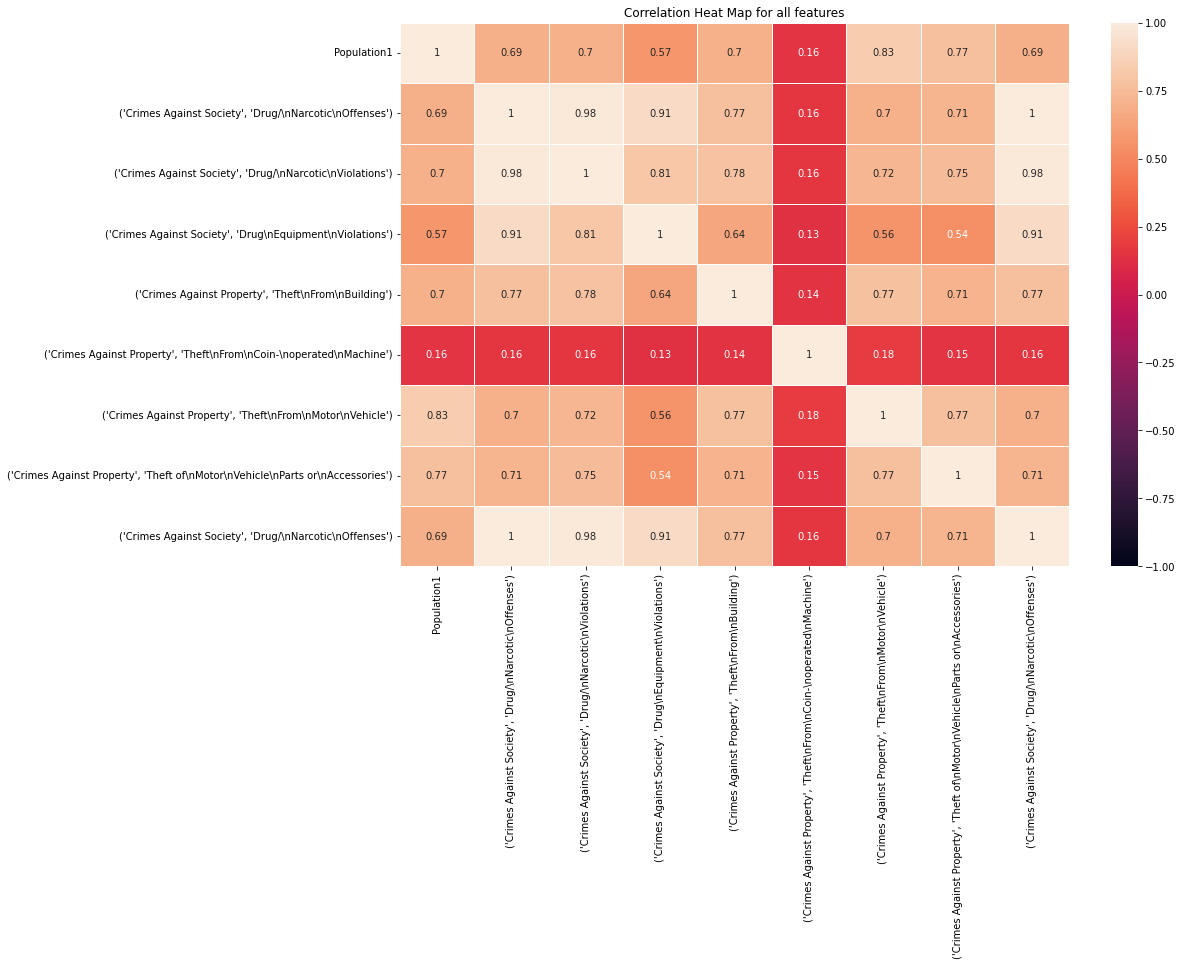

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(X.corr(), annot=True,linewidth=.5, vmin=-1, vmax=1)
plt.title("Correlation Heat Map for all features")

Using PCA as the co-relation is very good among the variables which causes the standard linear regression to fail

- There are some obvious relations such as 
As the Drug Narcotic Offenses is addition of Drug Narcotic Violations and Drug Equipment Violations according to metadata we can confidently only consider Drug Narcotic Offenses
- But we choose to let the theft features be even though there is an abvious dependency as the total encompases alot more variables than the 3 we have taken

In [ ]:
X = X.drop(columns = [df.columns[index_cal(df.columns, cat = "Drug/\nNarcotic\nViolations")], df.columns[index_cal(df.columns, cat = "Drug\nEquipment\nViolations")]], axis = 1)
X

,Population1,"(Crimes Against Society, Drug/\nNarcotic\nOffenses)","(Crimes Against Property, Theft\nFrom\nBuilding)","(Crimes Against Property, Theft\nFrom\nCoin-\noperated\nMachine)","(Crimes Against Property, Theft\nFrom\nMotor\nVehicle)","(Crimes Against Property, Theft of\nMotor\nVehicle\nParts or\nAccessories)","(Crimes Against Society, Drug/\nNarcotic\nOffenses)"
0,82332.0,495.0,410.0,4.0,418.0,127.0,495.0
1,36986.0,308.0,12.0,1.0,52.0,52.0,308.0
2,214264.0,2069.0,96.0,3.0,720.0,35.0,2069.0
3,0.0,437.0,0.0,0.0,8.0,4.0,437.0
4,5439.0,66.0,39.0,0.0,39.0,0.0,66.0
...,...,...,...,...,...,...,...
5230,0.0,196.0,110.0,0.0,36.0,8.0,196.0
5231,0.0,55.0,29.0,0.0,28.0,8.0,55.0
5232,0.0,49.0,0.0,0.0,3.0,1.0,49.0
5233,0.0,92.0,12.0,0.0,12.0,1.0,92.0


In [ ]:
data_pca = (X - X.mean())/X.std()
data_pca = data_pca.T.reset_index(drop=True).T

In [ ]:
data_pca

,0,1,2,3,4,5,6
0,2.003261,1.044830,2.221255,0.212311,1.122167,0.839891,1.044830
1,0.742010,0.538969,-0.176648,-0.002158,-0.048220,0.267934,0.538969
2,5.672812,5.302717,0.329442,0.140821,2.087897,0.138291,5.302717
3,-0.286717,0.887932,-0.248947,-0.073647,-0.188923,-0.098118,0.887932
4,-0.135437,-0.115674,-0.013976,-0.073647,-0.089791,-0.128622,-0.115674
...,...,...,...,...,...,...,...
5230,-0.286717,0.235993,0.413790,-0.073647,-0.099385,-0.067614,0.235993
5231,-0.286717,-0.145431,-0.074225,-0.073647,-0.124967,-0.067614,-0.145431
5232,-0.286717,-0.161662,-0.248947,-0.073647,-0.204911,-0.120996,-0.161662
5233,-0.286717,-0.045341,-0.176648,-0.073647,-0.176131,-0.120996,-0.045341


In [ ]:
pca = PCA(n_components=6)
pca.fit(data_pca)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
print("Explained captured variance by each component = ", explained_variance)
print("Explained cumulative captured variance by components = ", cum_explained_variance)

print("Explained captured variance with 2 components = ", sum(explained_variance))

Explained captured variance by each component =  [0.68703114 0.13732232 0.07878435 0.04109389 0.03443099 0.02133731]
Explained cumulative captured variance by components =  [0.68703114 0.82435346 0.90313781 0.9442317  0.97866269 1.        ]
Explained captured variance with 2 components =  0.9999999999999999


We take 4/5 components

im taking 5 components

> ### **Modelling methods**

In [ ]:
pca = PCA(n_components=5)
data_lr = pca.fit_transform(data_pca)

In [ ]:
data_lr

array([[ 3.37145905, -0.14222539, -0.39798482, -0.85465846, -0.25194109],
       [ 0.75929004, -0.08308684,  0.16884026,  0.59174968, -0.414052  ],
       [ 7.72178686, -0.64225736,  2.15197877,  2.03300198, -4.8014694 ],
       ...,
       [-0.48764128, -0.0250543 ,  0.06414512,  0.07550701,  0.07219197],
       [-0.35003697, -0.04168038,  0.17760192,  0.04926607,  0.05838249],
       [-0.50524947, -0.02356717,  0.01681966,  0.01444081,  0.10766571]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_lr, y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3926, 5), (1309, 5), (3926,), (1309,))

In [ ]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
print("intercept_ = ", model1.intercept_,"\n", "coef_ = ", model1.coef_,"\n", "R2 score = ", model1.score(X_train, y_train))

intercept_ =  692.3721688066646 
 coef_ =  [1178.63158576  -82.23693486 -126.07015406  -50.44457413  409.14854668] 
 R2 score =  0.9509895956778004


> ### **Models evaluation**

In [ ]:
def RMSE_MAE(model, X_test, y_test):
  RMSE = mean_squared_error(y_test, model.predict(X_test), squared= False)
  MAE = mean_absolute_error(y_test, model.predict(X_test))
  MSE = mean_squared_error(y_test, model.predict(X_test))
  print(type(model).__name__,"\n")
  print("RMSE = ", RMSE, "\n", "MAE = ", MAE, "\n", "MSE = ", MSE)

In [ ]:
RMSE_MAE(model1, X_test, y_test)

LinearRegression 

RMSE =  865.4399382453512 
 MAE =  220.61999294246908 
 MSE =  748986.2867101174


In [ ]:
scores = cross_val_score(model1, X_test, y_test, cv=5)
scores

array([ 0.95804947,  0.83148883,  0.90461405,  0.84242363, -1.32228496])

In [ ]:
res = []
for lambda_par in np.arange(0.01, 1.0, 0.01):
  clf = Lasso(alpha=lambda_par)
  clf.fit(X_train, y_train)
  res.append([clf, lambda_par, mean_squared_error(y_test, clf.predict(X_test), squared= False)])

res_df = pd.DataFrame(res , columns = ["Model", "Lambda", "RMSE"])
res_df = res_df.sort_values(by = "RMSE")
res_df

,Model,Lambda,RMSE
98,Lasso(alpha=0.99),0.99,864.897178
97,Lasso(alpha=0.98),0.98,864.902598
96,Lasso(alpha=0.97),0.97,864.908020
95,Lasso(alpha=0.9600000000000001),0.96,864.913443
94,Lasso(alpha=0.9500000000000001),0.95,864.918869
...,...,...,...
4,Lasso(alpha=0.05),0.05,865.414564
3,Lasso(alpha=0.04),0.04,865.420154
2,Lasso(alpha=0.03),0.03,865.425746
1,Lasso(alpha=0.02),0.02,865.431340


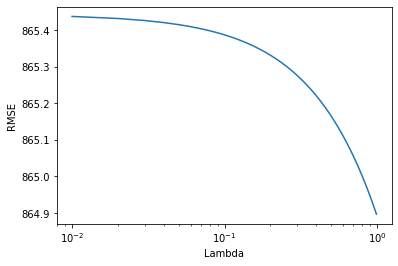

In [ ]:
sns.lineplot(data = res_df, x= 'Lambda', y = 'RMSE')
plt.xscale('log')

In [ ]:
model2 = res_df["Model"].iloc[0]
model2

Lasso(alpha=0.99)

In [ ]:
RMSE_MAE(model2, X_test, y_test)
print("intercept_ = ", model2.intercept_,"\n", "coef_ = ", model2.coef_,"\n", "R2 score = ", model2.score(X_train, y_train))

Lasso 

RMSE =  864.8971784773719 
 MAE =  220.278221861578 
 MSE =  748047.129338119
intercept_ =  692.3381005040925 
 coef_ =  [1178.42167425  -81.15794483 -123.81841888  -46.74507836  404.87993822] 
 R2 score =  0.9509877794246799


In [ ]:
res_rf = []
for depth in range(2,10):
  model3 = RandomForestRegressor(max_depth=depth, random_state=0)
  model3.fit(X_train, y_train)
  res_rf.append([model3, depth, mean_squared_error(y_test, model3.predict(X_test), squared= False)])

res_rf_df = pd.DataFrame(res_rf, columns = ["Model", "Depth", "RMSE"])
res_rf_df = res_rf_df.sort_values(by = "RMSE")
res_rf_df

,Model,Depth,RMSE
4,"(DecisionTreeRegressor(max_depth=6, max_featur...",6,791.919150
2,"(DecisionTreeRegressor(max_depth=4, max_featur...",4,807.510257
3,"(DecisionTreeRegressor(max_depth=5, max_featur...",5,808.376613
7,"(DecisionTreeRegressor(max_depth=9, max_featur...",9,809.892814
6,"(DecisionTreeRegressor(max_depth=8, max_featur...",8,812.903451
5,"(DecisionTreeRegressor(max_depth=7, max_featur...",7,824.452582
1,"(DecisionTreeRegressor(max_depth=3, max_featur...",3,869.903566
0,"(DecisionTreeRegressor(max_depth=2, max_featur...",2,1045.663444


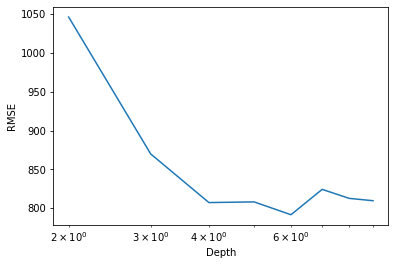

In [ ]:
sns.lineplot(data = res_rf_df, x= 'Depth', y = 'RMSE')
plt.xscale('log')

In [ ]:
model4 = res_rf_df["Model"].iloc[0]
model4


RandomForestRegressor(max_depth=6, random_state=0)

In [ ]:
RMSE_MAE(model4, X_test, y_test)
print("R2 score = ", model4.score(X_train, y_train))

RandomForestRegressor 

RMSE =  791.9191498546378 
 MAE =  209.78792131997113 
 MSE =  627135.9399064922
R2 score =  0.9731733902638245


In [ ]:
scores2 = cross_val_score(model4, X_test, y_test, cv=5)
scores2

array([0.54145963, 0.87951444, 0.89131112, 0.92805543, 0.87020669])

> # **9- Conclusion**
---

- We can see from the above that Randam foresst regressor is better than Linear regression and lasso Lasso regression with different lambda values


- As we are considering part of the features that is to be expected and random foreast is trying more to capture that inadequecy.

> # **10- Reference**
---